# Analyzing Trump's speeches Using Natural Language Processing


In this project, I will walk you through my analysis Donald Trump's speeches using Python and Natural Language Processing (NLP) techniques.

Done by: Hind Alamri

In [691]:
import sys
print(sys.executable)

/Users/hindsalem/opt/anaconda3/bin/python


In [692]:
# import nltk
# nltk.download()
#!pip install pyarabic
#!pip install wordcloud
#!pip install spacy
#!pip install spicy
# !python -m spacy download en
# !pip install vaderSentiment
# !pip install scattertext
# !pip install flair
# nltk.download("stopwords")
# nltk.download('punkt')
# import nltk
# nltk.download('all')
# ! pip install pyLDAvis
# !pip install --upgrade jupyter notebook
# !conda update anaconda


In [762]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import re
import matplotlib.colors as mcolors

# gensim

import gensim
from gensim.utils import simple_preprocess
from gensim.models import Phrases, phrases, ldamodel, CoherenceModel
import gensim.corpora as corpora


import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from spacy import displacy
import spacy
from sklearn.cluster import KMeans
#vis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from corextopic import corextopic as ct
import scattertext as st


from sklearn.decomposition import LatentDirichletAllocation

import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import scale
from sklearn.datasets import make_blobs
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hindsalem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [763]:
df=pd.read_csv('/Users/hindsalem/Desktop/Book1.csv')
df
# pd.re


content
0   I want to thank you very much. North Carolina,...
1   hey don't even want to spend money on the mili...
2   Thank you. Thank you. Thank you to Vice Presid...
3    General say, "You have these horrible � he's ...
4   , and we're not closing them up. We're going t...
..                                                ...
71  ats need to stop their madness and pass the US...
72  Thank you. Thank you. I love New Jersey and I'...
73  el's true capital and opened the American Emba...
74  Oh, thank you very much, everybody. Thank you....
75  thy, stay sharp, be careful. Be very careful. ...

[76 rows x 1 columns]

 We have 79 speeches.

### EDA and Preprocessing


In [764]:
# data overview
print ('Rows     : ', df.shape[0])
print ('Columns  : ', df.shape[1])
print ('\nFeatures : ', df.columns.tolist())
print ('\nMissing values :  ', df.isnull().sum().values.sum())
print('\n Dublicated speeches',df.content.duplicated().sum())

print ('\nUnique values :  \n', df.nunique())


Rows     :  76
Columns  :  1

Features :  ['content']

Missing values :   0

 Dublicated speeches 3

Unique values :  
 content    73
dtype: int64


In [765]:
df.drop_duplicates(subset=['content'])

content
0   I want to thank you very much. North Carolina,...
1   hey don't even want to spend money on the mili...
2   Thank you. Thank you. Thank you to Vice Presid...
3    General say, "You have these horrible � he's ...
4   , and we're not closing them up. We're going t...
..                                                ...
71  ats need to stop their madness and pass the US...
72  Thank you. Thank you. I love New Jersey and I'...
73  el's true capital and opened the American Emba...
74  Oh, thank you very much, everybody. Thank you....
75  thy, stay sharp, be careful. Be very careful. ...

[73 rows x 1 columns]

In [766]:
len_speechs=[]
for i in range(len(df['content'])):
    len_speechs.append(len(df['content'][i]))
len_speechs

[32759,
 4414,
 32671,
 32695,
 30392,
 32759,
 32759,
 24217,
 32759,
 19035,
 32759,
 4414,
 32759,
 12175,
 32759,
 32759,
 30363,
 32759,
 24322,
 32759,
 31755,
 32759,
 17713,
 32759,
 32759,
 21511,
 32759,
 22172,
 25420,
 32759,
 16323,
 32759,
 21905,
 32759,
 32759,
 9136,
 32759,
 32759,
 2016,
 32759,
 16978,
 32759,
 19456,
 32759,
 32759,
 11150,
 32759,
 30650,
 32759,
 32759,
 12564,
 32759,
 22629,
 32759,
 16617,
 32759,
 4071,
 32759,
 30532,
 32759,
 8,
 32759,
 19881,
 32759,
 32261,
 14610,
 32759,
 25968,
 32759,
 8,
 32759,
 18369,
 32759,
 6230,
 32759,
 1711]

## Text Cleaning

In [771]:
import re
import string
def clean_text(df):
    all_text = list()
    lines = df["content"].values.tolist()
    for text in lines:
        text = text.lower()
        
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)
        
        emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        text = emoji.sub(r'', text)
        
        text = re.sub(r"i'm", "i am", text)
        text = re.sub(r"he's", "he is", text)
        text = re.sub(r"she's", "she is", text)
        text = re.sub(r"that's", "that is", text)        
        text = re.sub(r"what's", "what is", text)
        text = re.sub(r"where's", "where is", text) 
        text = re.sub(r"\'ll", " will", text)  
        text = re.sub(r"\'ve", " have", text)  
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"won't", "will not", text)
        text = re.sub(r"don't", "do not", text)
        text = re.sub(r"did't", "did not", text)
        text = re.sub(r"can't", "can not", text)
        text = re.sub(r"it's", "it is", text)
        text = re.sub(r"couldn't", "could not", text)
        text = re.sub(r"have't", "have not", text)
        
        text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
        tokens = word_tokenize(text)
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()]
#         stop_words = set(stopwords.words("english"))
#         stop_words.discard("not")
#         words = [w for w in words if not w in stop_words]
        words = ' '.join(words)
        all_text.append(words)
#         all_text = word_tokenize(text)

    return all_text

all_text = clean_text(df)
all_text

['i want to thank you very much north carolina thank you very much i am thrilled to back in the great city of charlotte where by the way we are having our convention i guess you heard that right with thousands of hardworking american patriots who love our country cherish our values respect our laws and always put america first eight months from now we are going to defeat the radical socialists we are going to win the great state of north carolina in a landslide we won it last time we are going to win it this time by even more and you know eric and lara named their daughter you know what her name is carolina carolina her name is carolina for a reason this is an incredible time for our nation our country is stronger than ever before and today we just had the largest one day increase in the stock market in history that is great that is great that was great you know our opponents were saying oh maybe he is in trouble maybe the economy they will do anything they will do anything i am sure t

In [772]:
cleaning_list = ["+", ":","#",'$','/',',','?','.',';','-','@','!',"&","%","^","*",")",'(','\n', 'http','€']
for item in cleaning_list:
    df['content'] = df['content'].str.replace(item, " ")

In [773]:
# df.columns = ["content"]
cleaned_text = clean_text(df)
cleaned_text

['i want to thank you very much north carolina thank you very much i am thrilled to back in the great city of charlotte where by the way we are having our convention i guess you heard that right with thousands of hardworking american patriots who love our country cherish our values respect our laws and always put america first eight months from now we are going to defeat the radical socialists we are going to win the great state of north carolina in a landslide we won it last time we are going to win it this time by even more and you know eric and lara named their daughter you know what her name is carolina carolina her name is carolina for a reason this is an incredible time for our nation our country is stronger than ever before and today we just had the largest one day increase in the stock market in history that is great that is great that was great you know our opponents were saying oh maybe he is in trouble maybe the economy they will do anything they will do anything i am sure t

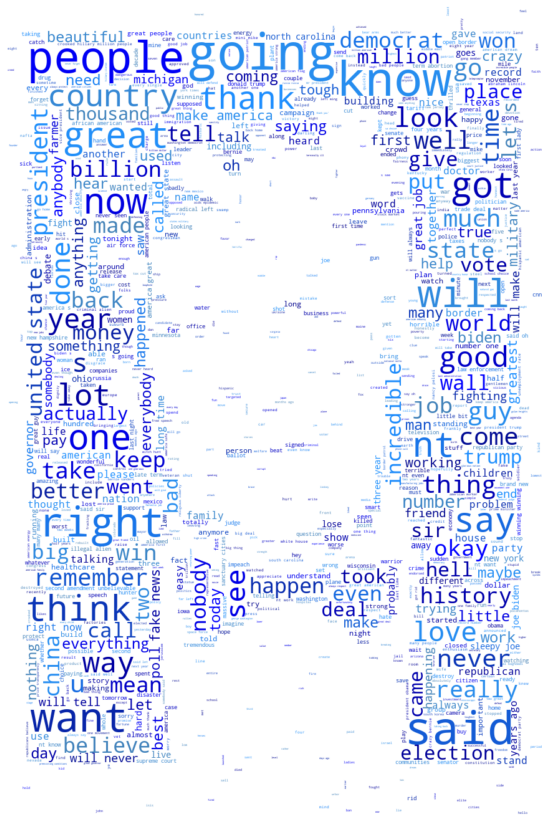

In [774]:
text = str(cleaned_text)



mask_image_path = "/Users/hindsalem/Desktop/mask4.png"

trump_coloring = np.array(Image.open(mask_image_path, 'r'))
colors = ["#0000FF", "#00008B",'#1E90FF','SteelBlue']
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

wc = WordCloud(background_color="white",
               max_words=1000, 
               mask=trump_coloring,
               stopwords=set(STOPWORDS), 
               colormap=cmap,
               max_font_size=80, 
               random_state=42,
               width=800,
               height=800)
# generate word cloud
wc.generate(text)
plt.figure(figsize=[10,15])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()
# wc.recolor(color_func=ImageColorGenerator(trump_coloring)).to_file("trump_cloud.jpg")



## Topic Modeling
Using feature extracted from Count Vectorizer and TF-IDF Vectorizer, we will try and compare different topic modeling algorithms LSA, LDA, Corex and NMF to extract topics for a set of processed tweets.


lemmatization is the process of grouping together the inflected forms of a word so they can be analysed as a single item.

In [702]:
def lemmatization(texts,allowed_postags=["NOUN", "ADJ", "VERB"]):
    nlp=spacy.load('en_core_web_sm',isable=["parser", "ner"])
    text_out=[]
    for text in texts:
        doc=nlp(text)
        new_text=[]
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final=' '.join(new_text)
        text_out.append(final)
    return text_out   
        

In [703]:
lemmatized_texts =lemmatization(cleaned_text)

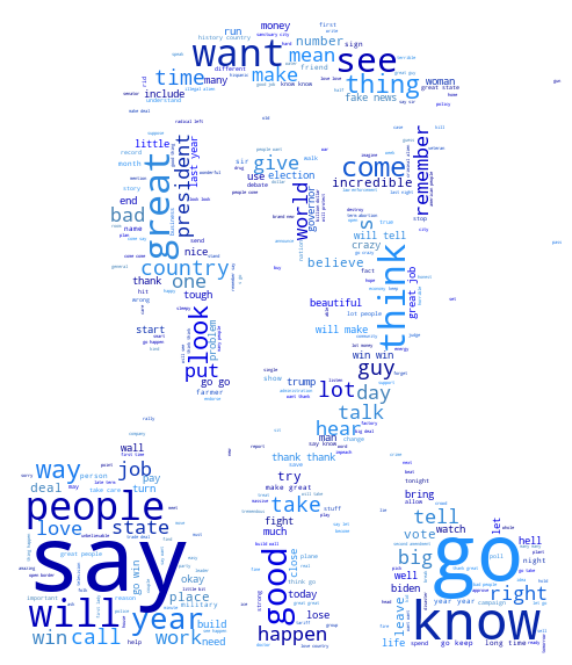

In [704]:
text = str(lemmatized_texts)



mask_image_path = "/Users/hindsalem/Desktop/mask1.png"

trump_coloring = np.array(Image.open(mask_image_path, 'r'))
colors = ["#0000FF", "#00008B",'#1E90FF','SteelBlue']
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

wc = WordCloud(background_color="white",
               max_words=1000, 
               mask=trump_coloring,
               stopwords=set(STOPWORDS), 
               colormap=cmap,
               max_font_size=80, 
               random_state=42,
               width=800,
               height=800)
# generate word cloud
wc.generate(text)
plt.figure(figsize=[10,15])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [705]:
f=pd.DataFrame(lemmatized_texts,columns=['content'])
f

content
0   want thank thank thrilled back great city way ...
1   want spend money military like military go spe...
2   thank thank thank vice good guy do great job t...
3   say horrible go lose go lose go win see zero b...
4   close go lot alternative can pricing can lot d...
..                                                ...
71  need stop madness pass usmca last administrati...
72  thank thank love thrilled garden state thank g...
73  true capital open recognize israeli sovereignt...
74  thank thank thank thank consider catch spy cam...
75  stay sharp be careful careful go work hell nee...

[76 rows x 1 columns]

In [706]:
from collections import Counter

f['temp_list'] = f['content'].apply(lambda x:str(x).split())
top = Counter([item for sublist in f['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(100))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

In [707]:
# top.most_common(22)
words=[]
for tupel in top.most_common(22):
    words.append(tupel[0])
words

['say',
 'go',
 'will',
 'great',
 'know',
 'people',
 'get',
 'want',
 'year',
 'do',
 'would',
 'think',
 'can',
 'see',
 'make',
 'good',
 'take',
 'come',
 'country',
 'win',
 'thank',
 'thing']

In [708]:
for item in words:
    lemmatized_texts =[i.replace(item, "") for i in lemmatized_texts]

In [709]:
lemmatized_texts =lemmatization(lemmatized_texts)

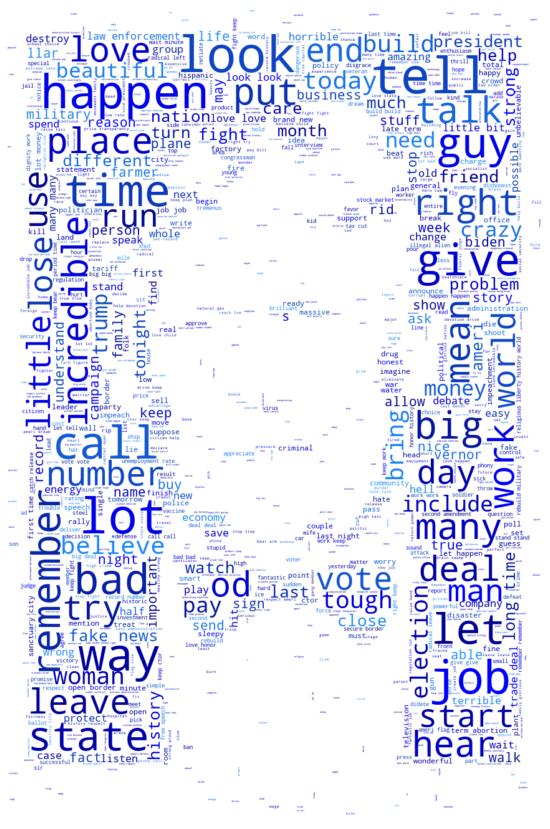

In [710]:
text=str(lemmatized_texts)



mask_image_path = "/Users/hindsalem/Desktop/mask4.png"

trump_coloring = np.array(Image.open(mask_image_path, 'r'))
colors = ["#0000FF", "#00008B",'#1E90FF']
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

wc = WordCloud(background_color="white",
               max_words=1000, 
               mask=trump_coloring,
               stopwords=set(STOPWORDS), 
               colormap=cmap,
               max_font_size=80, 
               random_state=42,
               width=800,
               height=800)
# generate word cloud
wc.generate(text)
plt.figure(figsize=[10,15])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()
# wc.recolor(color_func=ImageColorGenerator(trump_coloring)).to_file("trump_cloud.jpg")



Convert a document into a list of tokens.


In [711]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)



In [712]:
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

print (corpus[0][0:20])

word = id2word
word

[(0, 2), (1, 3), (2, 1), (3, 1), (4, 2), (5, 2), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 4), (15, 2), (16, 8), (17, 1), (18, 1), (19, 1)]


> LDA

In [738]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

#### Vizualizing the Data

In [739]:

pyLDAvis.enable_notebook()
# eautomatically embed visualizations in IPython notebook


vis = gensimvis.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.028898 -0.017959       1        1  34.170781
1      0.057020  0.046889       2        1  23.715118
2      0.005556 -0.079070       3        1  16.912482
0     -0.035354  0.071180       4        1  11.453229
4      0.029239  0.111240       5        1  10.490187
6      0.085106 -0.077530       6        1   3.162694
5     -0.170465 -0.054751       7        1   0.095509, topic_info=          Term        Freq       Total Category  logprob  loglift
293       many  486.000000  486.000000  Default  30.0000  30.0000
288        lot  707.000000  707.000000  Default  29.0000  29.0000
397        put  315.000000  315.000000  Default  28.0000  28.0000
546       vote  339.000000  339.000000  Default  27.0000  27.0000
274        let  539.000000  539.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
326       need    0.145230  182.271196   Topic7  -6.2922  -0.1812
419    republi    0.139770  111.204461   Topic7  -6.3305   0.2746
342        old    0.138932  121.777443   Topic7  -6.3365   0.1777
235  important    0.139373  138.498349   Topic7  -6.3334   0.0522
372       poll    0.138958  168.387001   Topic7  -6.3364  -0.1461

[626 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
2         1  0.150790  access
2         3  0.150790  access
2         4  0.753952  access
1110      1  0.086843  accord
1110      2  0.347371  accord
...     ...       ...     ...
569       2  0.256899   world
569       3  0.113514   world
569       4  0.152347   world
569       5  0.095590   world
569       6  0.035846   world

[1394 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 1, 5, 7, 6])

## Using CountVectorizer

In [715]:
cv = CountVectorizer(stop_words=stop_words)
cv_X = cv.fit_transform(lemmatized_texts)
vec = pd.DataFrame(data=cv_X.toarray(),columns =cv.get_feature_names())
vec

abide  ability  able  abolish  abortion  absolute  abuse  abusive  \
0       0        0     2        0         3         0      0        0   
1       0        0     0        0         0         0      0        0   
2       0        0     3        0         0         0      0        0   
3       0        0     0        0         0         1      0        1   
4       0        0     1        0         3         0      0        0   
..    ...      ...   ...      ...       ...       ...    ...      ...   
71      0        0     0        0         3         0      0        0   
72      0        0     5        0         3         0      2        1   
73      0        0     0        0         0         0      0        0   
74      0        0     0        2         0         0      1        0   
75      0        0     0        0         0         0      0        0   

    academy  accept  ...  yesterday  ymca  yoga  young  youth  yuma  zealot  \
0         0       0  ...          0     0     0      2      0     0       0   
1         0       0  ...          0     0     0      0      0     0       0   
2         0       0  ...          2     0     0      0      0     0       0   
3         0       0  ...          1     0     0      0      0     0       0   
4         0       0  ...          0     0     0      2      0     0       0   
..      ...     ...  ...        ...   ...   ...    ...    ...   ...     ...   
71        0       1  ...          0     0     0      0      0     0       0   
72        0       0  ...          1     0     0      1      0     0       0   
73        0       0  ...          0     0     0      0      0     0       0   
74        0       2  ...          0     0     0      1      0     0       1   
75        0       0  ...          0     0     0      0      0     1       0   

    zone  zoning  zucker  
0      0       0       0  
1      0       0       0  
2      0       0       0  
3      0       0       0  
4      0       0       0  
..   ...     ...     ...  
71     2       0       0  
72     1       0       0  
73     0       0       0  
74     0       0       0  
75     0       0       0  

[76 rows x 4065 columns]

## Using TF-IDF

In [716]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(lemmatized_texts)


df=pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names())
df

abide  ability      able   abolish  abortion  absolute     abuse  abusive  \
0     0.0      0.0  0.022986  0.000000  0.050010  0.000000  0.000000  0.00000   
1     0.0      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
2     0.0      0.0  0.033423  0.000000  0.000000  0.000000  0.000000  0.00000   
3     0.0      0.0  0.000000  0.000000  0.000000  0.024198  0.000000  0.03487   
4     0.0      0.0  0.010789  0.000000  0.046945  0.000000  0.000000  0.00000   
..    ...      ...       ...       ...       ...       ...       ...      ...   
71    0.0      0.0  0.000000  0.000000  0.075541  0.000000  0.000000  0.00000   
72    0.0      0.0  0.056344  0.000000  0.049034  0.000000  0.040073  0.03388   
73    0.0      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
74    0.0      0.0  0.000000  0.047154  0.000000  0.000000  0.018133  0.00000   
75    0.0      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   

    academy    accept  ...  yesterday  ymca  yoga     young  youth      yuma  \
0       0.0  0.000000  ...   0.000000   0.0   0.0  0.028211    0.0  0.000000   
1       0.0  0.000000  ...   0.000000   0.0   0.0  0.000000    0.0  0.000000   
2       0.0  0.000000  ...   0.032318   0.0   0.0  0.000000    0.0  0.000000   
3       0.0  0.000000  ...   0.016822   0.0   0.0  0.000000    0.0  0.000000   
4       0.0  0.000000  ...   0.000000   0.0   0.0  0.026481    0.0  0.000000   
..      ...       ...  ...        ...   ...   ...       ...    ...       ...   
71      0.0  0.035151  ...   0.000000   0.0   0.0  0.000000    0.0  0.000000   
72      0.0  0.000000  ...   0.016345   0.0   0.0  0.013830    0.0  0.000000   
73      0.0  0.000000  ...   0.000000   0.0   0.0  0.000000    0.0  0.000000   
74      0.0  0.041297  ...   0.000000   0.0   0.0  0.012516    0.0  0.000000   
75      0.0  0.000000  ...   0.000000   0.0   0.0  0.000000    0.0  0.178332   

      zealot      zone  zoning  zucker  
0   0.000000  0.000000     0.0     0.0  
1   0.000000  0.000000     0.0     0.0  
2   0.000000  0.000000     0.0     0.0  
3   0.000000  0.000000     0.0     0.0  
4   0.000000  0.000000     0.0     0.0  
..       ...       ...     ...     ...  
71  0.000000  0.064815     0.0     0.0  
72  0.000000  0.021036     0.0     0.0  
73  0.000000  0.000000     0.0     0.0  
74  0.033589  0.000000     0.0     0.0  
75  0.000000  0.000000     0.0     0.0  

[76 rows x 4009 columns]

Function for displaying the words in each topic to be used for all models.



In [717]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    x=[]
    for i, topic in enumerate(model.components_):
        if not topic_names or not topic_names[i]:
            print("\nTopic: ", i)
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 3:-1]]))

LSA model using features extracted from TF-IDF Vectorizer
Lets see how the model.

In [718]:
lsa = TruncatedSVD(4)
doc_topic= lsa.fit_transform(X_train_tfidf1)
display_topics(lsa, tfidf1.get_feature_names(), 18)


Topic:  0
time, job, look, lot, happen, tell, big, bad, love, way, let, work, state, deal, remember, guy, number, leave, believe, vote

Topic:  1
nation, swamp, fight, believe, help, defend, secure, child, citizen, safe, strong, new, proud, work, protect, stand, wealthy, shape, result, reelect

Topic:  2
swamp, shape, guy, trump, beautiful, reelect, military, debate, way, secure, strong, believe, survival, run, ass, sail, walk, look, poll, man

Topic:  3
biden, ballot, war, ban, police, suburb, nation, social, ventilator, law, endless, peace, vote, open, fracke, remember, job, save, prosecutor, football


In [719]:
lsa_7 = TruncatedSVD(7)
doc_topic= lsa.fit_transform(X_train_tfidf1)
display_topics(lsa, tfidf1.get_feature_names(), 18)


Topic:  0
time, job, look, lot, happen, tell, big, bad, love, way, let, work, state, deal, remember, guy, number, leave, believe, vote

Topic:  1
nation, swamp, fight, believe, help, defend, secure, child, citizen, safe, strong, new, proud, work, protect, stand, wealthy, shape, result, reelect

Topic:  2
swamp, shape, guy, trump, beautiful, military, reelect, debate, way, secure, strong, believe, survival, run, sail, ass, poll, walk, look, proud

Topic:  3
biden, ballot, war, ban, police, suburb, ventilator, nation, social, law, vote, job, endless, peace, fracke, open, save, prosecutor, remember, football



LDA model using features extracted from Count Vectorizer
Since LDA has a bulit in TD-IDF we will use CountVectorizer as the vectorizer. We will try the model on 2 to 6 number of topics in order to get the best results.



In [720]:
lda_2 = LatentDirichletAllocation(2)
lda_doc_topic = lda_2.fit_transform(cv_X)
display_topics(lda_2,cv.get_feature_names(),15)


Topic:  0
look, time, happen, job, lot, call, tell, way, bad, let, guy, big, give, love, remember, could, deal

Topic:  1
time, keep, job, lot, work, give, could, happen, love, big, look, many, fight, border, believe, tell, new


In [721]:
lda_7 = LatentDirichletAllocation(7)
lda_doc_topic = lda_7.fit_transform(cv_X)
display_topics(lda_7,cv.get_feature_names(),15)


Topic:  0
time, look, job, lot, tell, happen, let, big, way, give, call, guy, could, bad, love, remember, last

Topic:  1
likely, yuma, transplant, booth, date, sail, broken, owe, route, nonsense, weather, register, pricing, relation, label, disgusting, poisonous

Topic:  2
time, look, lot, happen, big, job, could, bad, love, give, border, build, keep, tell, last, state, deal

Topic:  3
call, look, time, way, love, happen, bad, job, many, could, tell, lot, let, guy, give, deal, remember

Topic:  4
job, give, keep, vote, time, call, big, work, many, number, way, lot, remember, let, deal, happen, world

Topic:  5
keep, believe, nation, fight, work, new, help, stand, could, give, protect, true, beautiful, time, ameri, child, happen

Topic:  6
likely, yuma, transplant, booth, date, sail, broken, owe, route, nonsense, weather, register, pricing, relation, label, disgusting, poisonous


>CorEx model using features extracted from Count Vectorizer and TF-IDF Vectorizer


function for displaying the words in each topic to be used for CorEx model.


In [722]:
def corex_topics(topic_model):
    topics = topic_model.get_topics()
    return topics
    for n,topic in enumerate(topics):
        topic_words,_ = zip(*topic)
        print('Topic {} keywords: '.format(n) + ', '.join(topic_words))

### count vectorizer


In [723]:
words = list(np.asarray(cv.get_feature_names()))
topic_model = ct.Corex(n_hidden=7, 
                       words=words,
                       max_iter=100, 
                       seed=42)

topic_model.fit(cv_X, words=words, docs=lemmatized_texts)



### TF-IDF

In [724]:

words = list(np.asarray(tfidf1.get_feature_names()))
topic_model_2 = ct.Corex(n_hidden=7, 
                       words=words,
                       max_iter=100, 
                       seed=42)
topic_model_2.fit(X_train_tfidf1, words=words, docs=lemmatized_texts)

In [725]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(lemmatized_texts)


df=pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names())
df

abide  ability      able   abolish  abortion  absolute     abuse  abusive  \
0     0.0      0.0  0.022986  0.000000  0.050010  0.000000  0.000000  0.00000   
1     0.0      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
2     0.0      0.0  0.033423  0.000000  0.000000  0.000000  0.000000  0.00000   
3     0.0      0.0  0.000000  0.000000  0.000000  0.024198  0.000000  0.03487   
4     0.0      0.0  0.010789  0.000000  0.046945  0.000000  0.000000  0.00000   
..    ...      ...       ...       ...       ...       ...       ...      ...   
71    0.0      0.0  0.000000  0.000000  0.075541  0.000000  0.000000  0.00000   
72    0.0      0.0  0.056344  0.000000  0.049034  0.000000  0.040073  0.03388   
73    0.0      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
74    0.0      0.0  0.000000  0.047154  0.000000  0.000000  0.018133  0.00000   
75    0.0      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   

    academy    accept  ...  yesterday  ymca  yoga     young  youth      yuma  \
0       0.0  0.000000  ...   0.000000   0.0   0.0  0.028211    0.0  0.000000   
1       0.0  0.000000  ...   0.000000   0.0   0.0  0.000000    0.0  0.000000   
2       0.0  0.000000  ...   0.032318   0.0   0.0  0.000000    0.0  0.000000   
3       0.0  0.000000  ...   0.016822   0.0   0.0  0.000000    0.0  0.000000   
4       0.0  0.000000  ...   0.000000   0.0   0.0  0.026481    0.0  0.000000   
..      ...       ...  ...        ...   ...   ...       ...    ...       ...   
71      0.0  0.035151  ...   0.000000   0.0   0.0  0.000000    0.0  0.000000   
72      0.0  0.000000  ...   0.016345   0.0   0.0  0.013830    0.0  0.000000   
73      0.0  0.000000  ...   0.000000   0.0   0.0  0.000000    0.0  0.000000   
74      0.0  0.041297  ...   0.000000   0.0   0.0  0.012516    0.0  0.000000   
75      0.0  0.000000  ...   0.000000   0.0   0.0  0.000000    0.0  0.178332   

      zealot      zone  zoning  zucker  
0   0.000000  0.000000     0.0     0.0  
1   0.000000  0.000000     0.0     0.0  
2   0.000000  0.000000     0.0     0.0  
3   0.000000  0.000000     0.0     0.0  
4   0.000000  0.000000     0.0     0.0  
..       ...       ...     ...     ...  
71  0.000000  0.064815     0.0     0.0  
72  0.000000  0.021036     0.0     0.0  
73  0.000000  0.000000     0.0     0.0  
74  0.033589  0.000000     0.0     0.0  
75  0.000000  0.000000     0.0     0.0  

[76 rows x 4009 columns]

CorEx topic modeling with count vectorizer



In [726]:
topics = corex_topics(topic_model)
topic_num=0
for topic in topics:
    print("topic ",topic_num, ":")
    for word in topic:
        print(word[0], end=", ")
    print(" ")
    print(" ")
    topic_num=topic_num+1

topic  0 :
impeachment, wilderness, couple, thrill, crazy, morning, fake, energy, whole, glorious,  
 
topic  1 :
human, sell, month, hit, campaign, article, expense, plenty, chairman, run,  
 
topic  2 :
low, long, nice, garbage, vote, choke, problem, advanced, reign, event,  
 
topic  3 :
crossing, effort, term, gang, flow, job, crime, throw, look, call,  
 
topic  4 :
opportunity, ready, high, invite, waste, today, new, military, extremist, chance,  
 
topic  5 :
politician, include, tireless, beautiful, strong, office, use, care, straight, constitution,  
 
topic  6 :
od, evening, cheap, lady, reform, smart, able, tie, wonderful, potential,  
 


CorEx topic modeling with TF-IDF vectorizer



In [727]:
topics = corex_topics(topic_model_2)
topic_num=0
for topic in topics:
    print("topic ",topic_num, ":")
    for word in topic:
        print(word[0], end=", ")
    print(" ")
    print(" ")
    topic_num=topic_num+1

topic  0 :
sail, date, swamp, shape, reelect, register, survival, mortgage, job, inherit,  
 
topic  1 :
able, quit, quid, questionable, purpose, purchase, pump, profitable, production, producer,  
 
topic  2 :
sane, bind, process, project, promise, promote, pronunciation, propellant, ability, property,  
 
topic  3 :
abide, punch, publication, provision, proud, protestor, prosper, pronounce, promotion, problem,  
 
topic  4 :
abolish, press, prepared, premium, preliminary, prefer, prayer, praise, powerful, pour,  
 
topic  5 :
baby, abortion, late, defend, guy, nation, illegal, alien, look, poll,  
 
topic  6 :
suburb, biden, fracke, vaccine, football, ballot, protest, burn, ventilator, police,  
 


## NMF model using features extracted from TF-IDF Vectorizer

In [728]:
nmf_model_4 = NMF(4)
nmf_doc_topic_4 = nmf_model_2.fit_transform(X_train_tfidf1)

In [729]:
display_topics(nmf_model_2, tfidf1.get_feature_names(), 15)



Topic:  0
time, look, job, lot, tell, happen, big, let, bad, remember, way, guy, love, state, deal, leave, number

Topic:  1
nation, fight, believe, help, work, swamp, new, child, defend, secure, strong, stand, citizen, safe, protect, ameri, proud


In [730]:
nmf_model_2 = NMF(2)
nmf_doc_topic_2 = nmf_model_2.fit_transform(X_train_tfidf1)

In [731]:
display_topics(nmf_model_2, tfidf1.get_feature_names(), 22)



Topic:  0
time, look, job, lot, tell, happen, big, let, bad, remember, way, guy, love, state, deal, leave, number, talk, vote, hear, work, election, use, little

Topic:  1
nation, fight, believe, help, work, swamp, new, child, defend, secure, strong, stand, citizen, safe, protect, ameri, proud, family, military, beautiful, drug, build, border, late


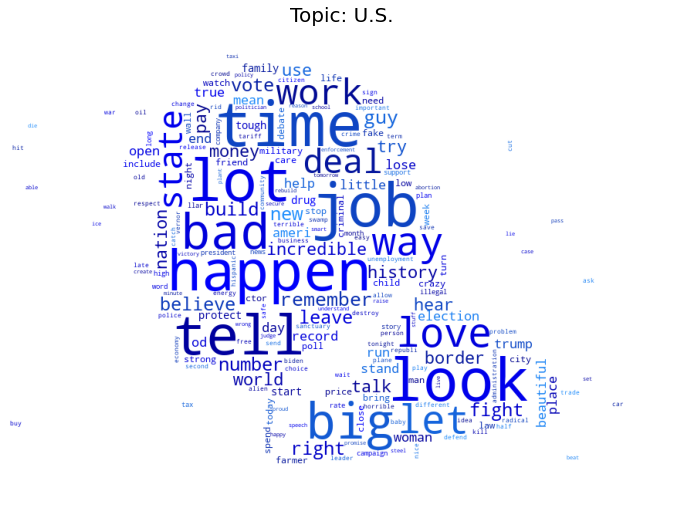

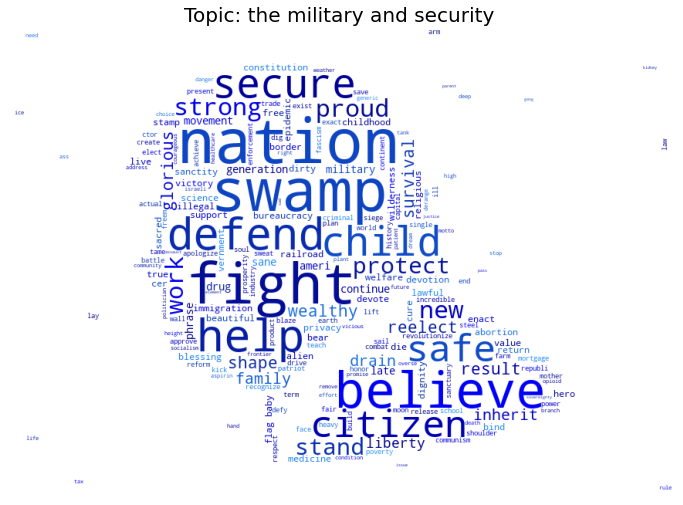

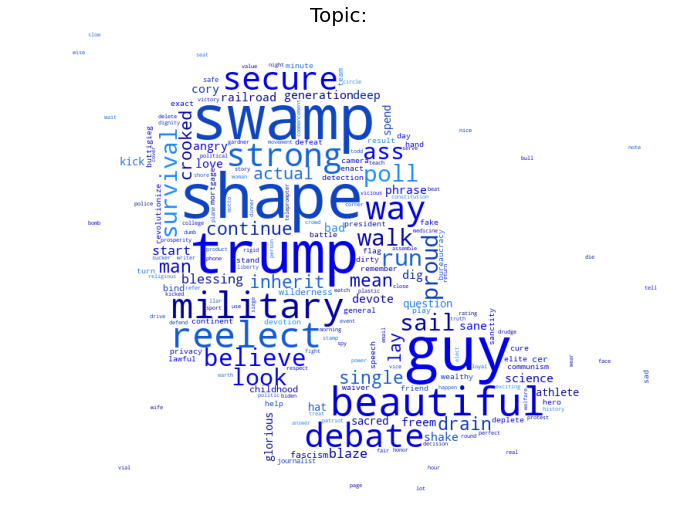

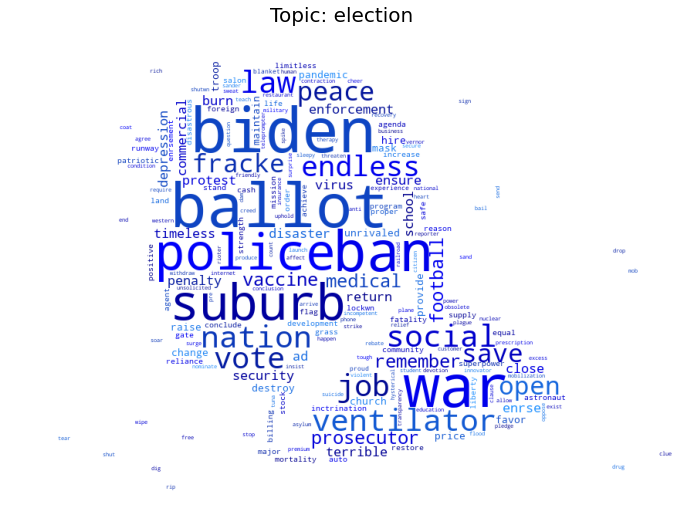

In [741]:
def get_word_freq(topic, model, n_top_words, vocab):
    word_dict = {};
    freq = sorted(model.components_[topic])[:-n_top_words - 1: -1]
    words_ids = model.components_[topic].argsort()[:-n_top_words - 1:-1]
    words = [vocab[key] for key in words_ids]
    for i in range(n_top_words):
        word_dict[words[i]] = freq[i]

    
    return word_dict

vocab=tfidf1.get_feature_names()
mask_image_path = "/Users/hindsalem/Desktop/mask.png"
trump_coloring = np.array(Image.open(mask_image_path, 'r'))
colors = ["#0000FF", "#00008B",'#1E90FF']
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

list_of_topics= ['U.S.','the military and security ','','election']
for topic in range(4):
    plt.figure(figsize = (12,14))
    plt.imshow(WordCloud(background_color="white",
               max_words=1000, 
               mask=trump_coloring,
               stopwords=set(STOPWORDS), 
               colormap=cmap,
               max_font_size=80, 
               random_state=42,
               width=800,
               height=800).fit_words(dict(get_word_freq(topic, lsa, 200, vocab))))
    plt.axis('off')
    plt.title('Topic: ' + list_of_topics[topic], size=20)
    plt.show();
    text=str(lemmatized_texts)




# trump_coloring = np.array(Image.open(mask_image_path, 'r'))
# colors = ["#0000FF", "#00008B",'#1E90FF']
# cmap = LinearSegmentedColormap.from_list("mycmap", colors)

# wc = WordCloud(background_color="white",
#                max_words=1000, 
#                mask=trump_coloring,
#                stopwords=set(STOPWORDS), 
#                colormap=cmap,
#                max_font_size=80, 
#                random_state=42,
#                width=800,
#                height=800)
# # generate word cloud
# wc.generate(text)
# plt.figure(figsize=[10,15])
# plt.imshow(wc, interpolation="bilinear")
# plt.axis('off')
# plt.show()

In [733]:
Vt = pd.DataFrame(doc_topic2.round(2),
             index = ex_label,
             columns = ["Topic_1","Topic_2" ,"Topic_3","Topic_4","Topic_5","Topic_6","Topic_7","Topic_8","Topic_9"])
Vt

Topic_1  Topic_2  Topic_3  \
i want to thank you very much north carolina th...   128.43   -23.16    -4.28   
hey do not even want to spend money on the mili...    14.45    -9.18     1.33   
thank you thank you thank you to vice president...   143.60    32.99     2.21   
general say you have these horrible he is going...   143.76    16.01     4.03   
and we are not closing them up we are going to ...   119.94   -15.55     1.55   
...                                                     ...      ...      ...   
ats need to stop their madness and pass the usm...    68.85   -20.29     9.35   
thank you thank you i love new jersey and i am ...   121.44   -46.41     6.53   
el s true capital and opened the american embas...    20.10   -14.57     4.19   
oh thank you very much everybody thank you well...   124.79   -21.28   -20.48   
thy stay sharp be careful be very careful go ou...     5.09    -1.34    -1.75   

                                                    Topic_4  Topic_5  Topic_6  \
i want to thank you very much north carolina th...    -0.67    58.68   -22.87   
hey do not even want to spend money on the mili...    -3.07    -1.67    -5.78   
thank you thank you thank you to vice president...    -2.51     2.84    22.47   
general say you have these horrible he is going...     3.17    11.59    26.00   
and we are not closing them up we are going to ...   -22.56    -2.41    13.97   
...                                                     ...      ...      ...   
ats need to stop their madness and pass the usm...   -14.13    -6.80    -3.53   
thank you thank you i love new jersey and i am ...     4.98    -3.76    20.39   
el s true capital and opened the american embas...    -4.07    -5.07    -1.69   
oh thank you very much everybody thank you well...    -6.83    -7.77     3.70   
thy stay sharp be careful be very careful go ou...     0.77    -0.95    -0.48   

                                                    Topic_7  Topic_8  Topic_9  
i want to thank you very much north carolina th...    -9.83     2.73     2.10  
hey do not even want to spend money on the mili...    -0.88    -5.56    -0.92  
thank you thank you thank you to vice president...   -30.45     9.18   -18.65  
general say you have these horrible he is going...   -13.34     4.77    -7.29  
and we are not closing them up we are going to ...    -0.79     1.82    -0.32  
...                                                     ...      ...      ...  
ats need to stop their madness and pass the usm...    -0.43    -2.92     5.25  
thank you thank you i love new jersey and i am ...    19.05    10.84    -7.63  
el s true capital and opened the american embas...     4.44    -5.56     1.98  
oh thank you very much everybody thank you well...    -1.25    24.51     6.22  
thy stay sharp be careful be very careful go ou...    -0.45     0.47     0.63  

[76 rows x 9 columns]

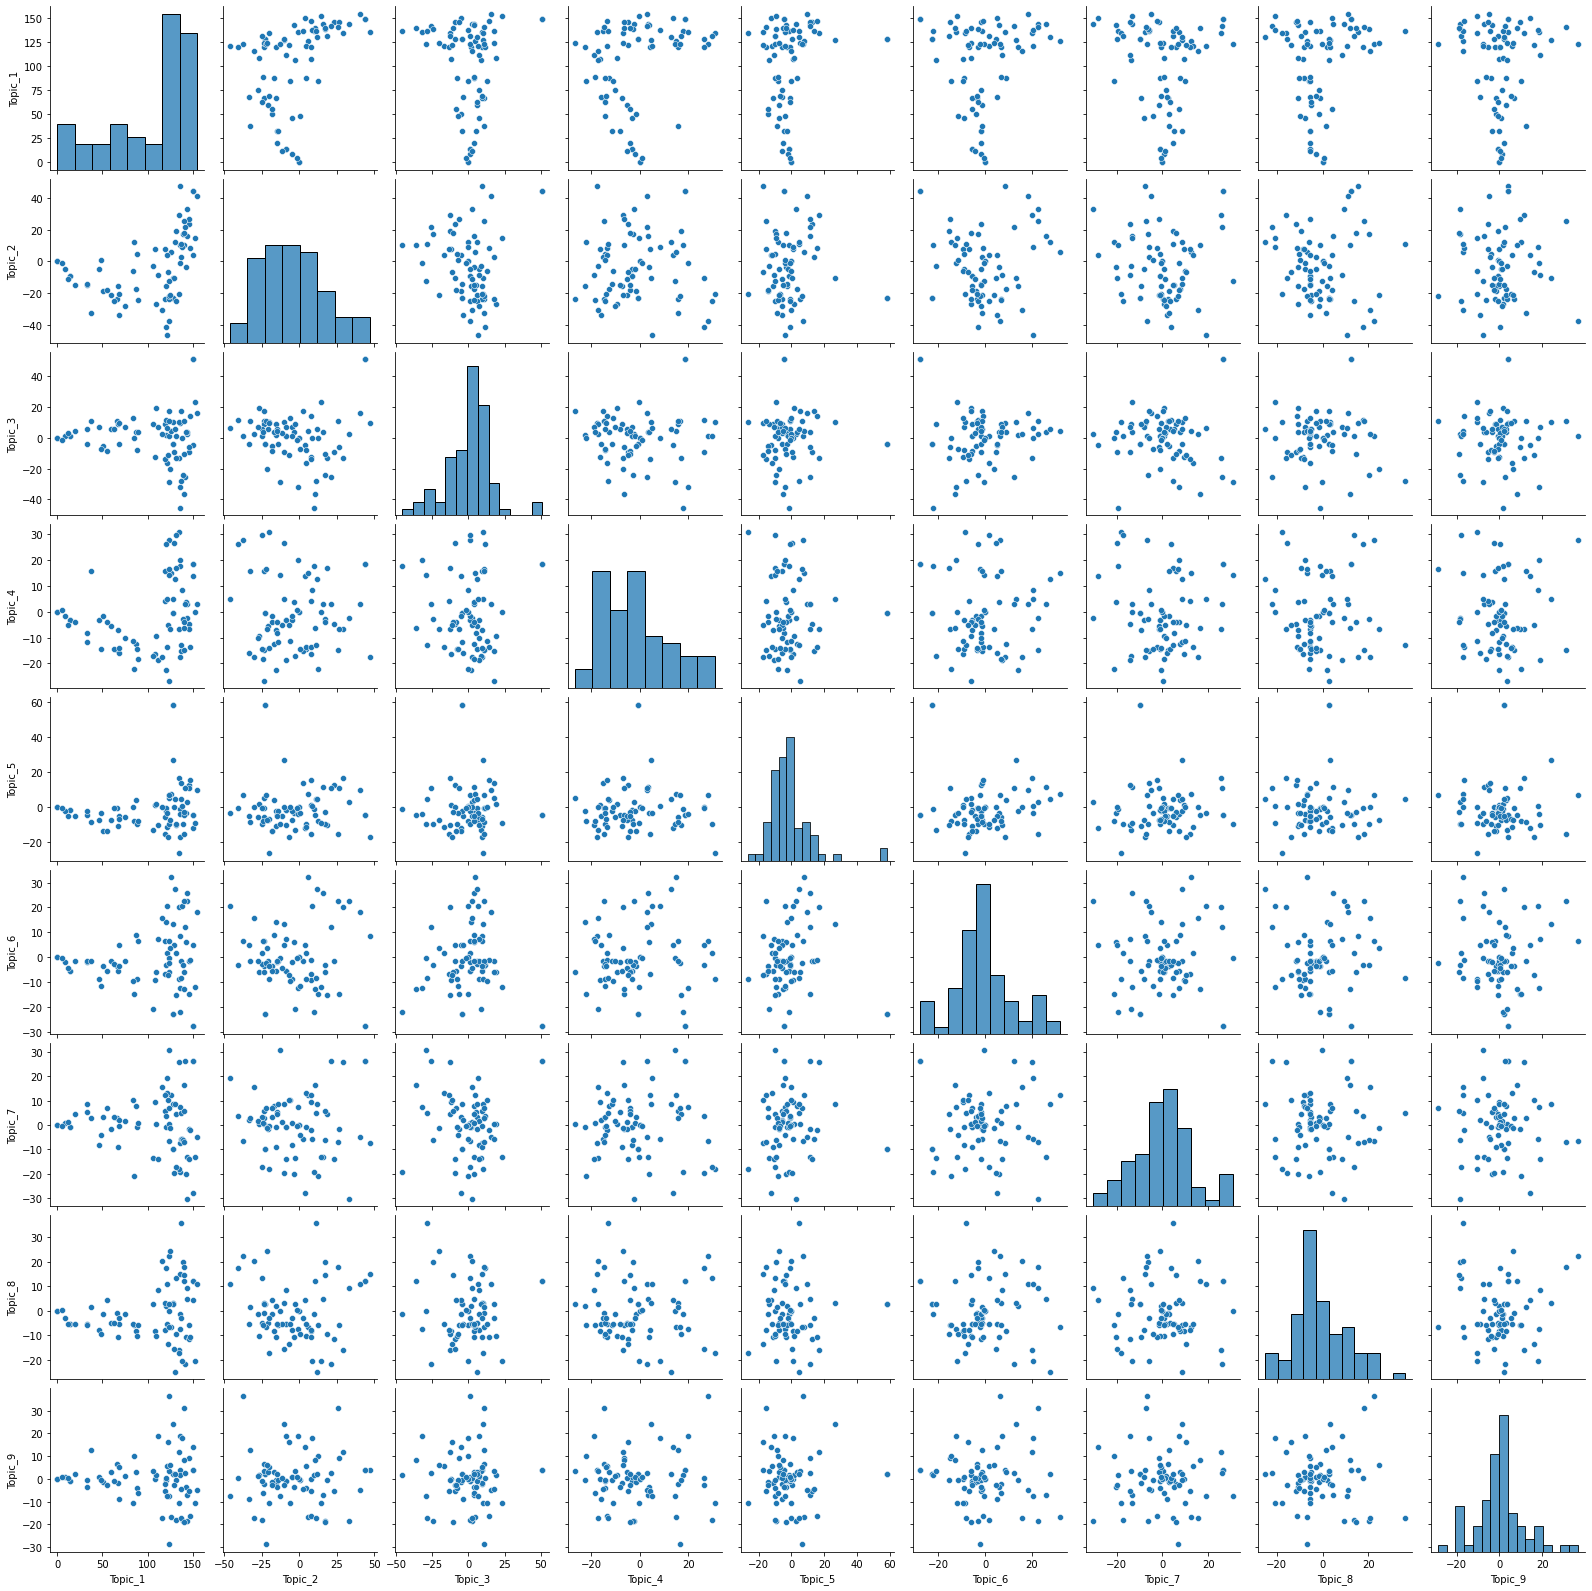

In [734]:
sns.pairplot(Vt)

In [735]:
sns.pairplot(Vt2)

NameError: name 'Vt2' is not defined

## kMeans Clustering


Now that the text preprocessing is done, I can finally apply the kMeans algorithm to cluster our description vectors. I won't list out all the steps to how the kMeans algorithm works but one thing to know is that in order for kMeans needs to initialize k centroids in order for it to start finding the k clusters. There are a few approaches to how the centroids are initilized but it typically involves some sort of randomization. Because of this randomness, the algorithm is not deterministic meaning that it might come up with different clusters if we run it multiple times. Therefore, it is wise to run the algorithm multiple times and have it choose the version that has the lowest within cluster variance, which I won't describe here. 

In [ ]:
inertia=[]

list_num_Clusters=list(range(1,11))
for num_clusters in list_num_Clusters:
    kn=KMeans(n_clusters=num_clusters)
    kn.fit(X)
    inertia.append(kn.inertia_)
plt.plot(list_num_Clusters,inertia)
plt.scatter(list_num_Clusters,inertia)
plt.xlabel('Number od Cluster')
plt.ylabel("Inertia")

In [ ]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(cv_X)
kmean_indices = kmeans.fit_predict(cv_X)


The point at which the elbow shape is created is 8, that is, our K value or an optimal number of clusters is 5. Now let’s train the model on the dataset with a number of clusters 8.



In [ ]:
colors = ["r", "b", "m", "y", "c"]
scatter_plot_points = pca.fit_transform(cv_X.toarray())


x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]



In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])